In [1]:
import pandas as pd

In [3]:
data=pd.read_csv(r"C:\Users\Dell\Desktop\historical_data.csv")

# Normalisation 

In [34]:
data['volume']=data['volume'].apply(lambda x:((x-min(data['volume']))/(max(data['volume'])-min(data['volume']))))

# preprocessing 

In [39]:
data.drop(['symbol','name','class_type_of','date_txn'],axis=1,inplace=True)

In [29]:
data.drop(data['low'].idxmin(),inplace=True)

In [47]:
data.dropna(inplace=True)

In [48]:
train=data.iloc[:550]
test=data.iloc[551:]

In [80]:
train_feature=train[['open','low','high','volume','lead_1','lead_5','lead_10']]
train_target=train['close_price']

In [81]:
test_feature=test[['open','low','high','volume','lead_1','lead_5','lead_10']]
test_target=test['close_price']

In [31]:
import numpy as np
from sklearn import linear_model 

In [107]:
reg = linear_model.LinearRegression()

In [108]:
reg.fit(train_feature,train_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [109]:
pred=reg.predict(test_feature)

In [110]:
pred

array([282.54869607, 283.13830861, 283.19741621, 283.80996329,
       285.95427998, 284.9856316 , 283.36768686, 281.92431239,
       281.49196067, 275.29759742, 269.72019582, 267.20079484,
       269.01401057, 262.11728924, 259.54172227, 265.38070657,
       266.49343405, 269.94497432, 271.5847975 , 274.01315335,
       272.22415803, 272.94292002, 272.32356995, 274.6285911 ,
       276.87287916, 276.03668018, 272.75980716, 269.72555933,
       272.43945481, 272.2563008 , 272.90784888, 274.36242233,
       278.85017526, 277.99294718, 276.08942256, 271.76648207,
       271.06986108, 271.29480353, 264.94795647, 261.90069147,
       263.07011053, 262.46567179, 261.25470942, 263.06346665,
       259.00093779, 260.34177279, 263.91311701, 264.80410794,
       261.64223575, 263.90734944, 264.7978774 , 265.30071243,
       266.40039409, 265.93791279, 267.97396356, 270.40861687,
       270.50559065, 268.42828905, 267.12992445, 266.21529643,
       264.47152108, 263.25933286, 266.69474812, 266.14

In [111]:
from sklearn.metrics import mean_squared_error, r2_score

In [112]:
print("%.2f"%mean_squared_error(pred,test_target))

1.94


In [73]:
import matplotlib.pyplot as mp

In [ ]:
mp.pai

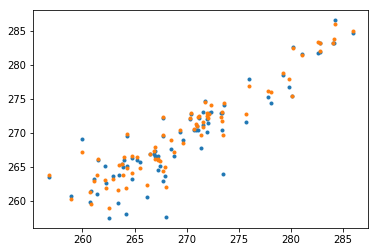

In [95]:
mp.plot(test['open'],test['close_price'],'.')
mp.plot(test['open'],pred,'.')